In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [33]:
df = pd.read_csv("employee_earnings_report_2024.csv")

In [34]:
df.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL GROSS,POSTAL
0,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"161,306.48","105,724.70","6,906.86","223,773.96",12.52,"45,597.23","32,261.36","575,583.11",02052
1,"Sordillo,Paul J",Facilities Management,Building Services Fleet Mgr,"108,815.78","20,055.71","413,783.39","24,772.61",NaN,NaN,NaN,"567,427.49",02127
2,"Smith,Sean P",Boston Police Department,Police Lieutenant,"155,265.97","96,850.51","21,740.86","148,505.22",NaN,"97,045.79","38,816.51","558,224.86",02186
3,"Connolly,Timothy",Boston Police Department,Police Captain/DDC,"178,073.23","99,063.23","27,649.74","193,677.07",126.81,"7,651.56","44,518.46","550,760.10",02186
4,"Danilecki,John H",Boston Police Department,Police Captain,"177,743.21","87,989.27","27,598.50","136,562.06",130.09,"70,060.84","44,435.86","544,519.83",02559


In [35]:
len(df)

25530

In [36]:
unique = df["NAME"].nunique()

In [37]:
print(unique)

25457


In [38]:
df = df.drop_duplicates(subset="NAME")
print(len(df))

25457


In [39]:
df.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL GROSS,POSTAL
0,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"161,306.48","105,724.70","6,906.86","223,773.96",12.52,"45,597.23","32,261.36","575,583.11",02052
1,"Sordillo,Paul J",Facilities Management,Building Services Fleet Mgr,"108,815.78","20,055.71","413,783.39","24,772.61",NaN,NaN,NaN,"567,427.49",02127
2,"Smith,Sean P",Boston Police Department,Police Lieutenant,"155,265.97","96,850.51","21,740.86","148,505.22",NaN,"97,045.79","38,816.51","558,224.86",02186
3,"Connolly,Timothy",Boston Police Department,Police Captain/DDC,"178,073.23","99,063.23","27,649.74","193,677.07",126.81,"7,651.56","44,518.46","550,760.10",02186
4,"Danilecki,John H",Boston Police Department,Police Captain,"177,743.21","87,989.27","27,598.50","136,562.06",130.09,"70,060.84","44,435.86","544,519.83",02559


In [40]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

REGULAR             1100
RETRO              18166
OTHER               8289
OVERTIME           17719
INJURED            23041
DETAIL             23176
QUINN_EDUCATION    24148
POSTAL                31
dtype: int64


In [41]:
df = df.drop(columns = "QUINN_EDUCATION")


In [42]:
df = df.drop(columns = "TOTAL GROSS")

In [43]:
filtered_df = df[df['REGULAR'].notna()]

In [44]:
len(filtered_df)

24357

In [45]:
df = df[df['REGULAR'].notna()]


In [46]:
df = df[df['OTHER'].notna()]

In [47]:
len(df)

16814

In [48]:
df = df[df['POSTAL'].notna()]

In [49]:
len(df)


16797

In [50]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

RETRO       10888
OVERTIME    10601
INJURED     14953
DETAIL      14647
dtype: int64


In [51]:
cols_to_convert = ['REGULAR','RETRO','OTHER','OVERTIME','INJURED','DETAIL','POSTAL']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

In [52]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

RETRO       10888
OVERTIME    10601
INJURED     14953
DETAIL      14647
POSTAL          2
dtype: int64


In [53]:
df = df[df['POSTAL'].notna()]

In [54]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

RETRO       10886
OVERTIME    10599
INJURED     14951
DETAIL      14645
dtype: int64


In [55]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import numpy as np

data = df

categorical_cols = data.select_dtypes(exclude=['number']).columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_data = data[categorical_cols]
mice_imputer = IterativeImputer(random_state=0, max_iter=20)
imputed_numeric = pd.DataFrame(
    mice_imputer.fit_transform(data[numeric_cols]),
    columns=numeric_cols
)


imputed_numeric = imputed_numeric.clip(lower=0)




mode_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(
    mode_imputer.fit_transform(categorical_data),
    columns=categorical_cols
)

imputed_data = pd.concat([imputed_categorical,imputed_numeric], axis=1)


missing_summary = pd.DataFrame({
    "Missing Before": data.isnull().sum(),
    "Missing After": imputed_data.isnull().sum()
})

df = imputed_data


In [56]:
missing_only = df[df.columns[df.isnull().any()]].isnull().sum()
print(missing_only)

Series([], dtype: float64)


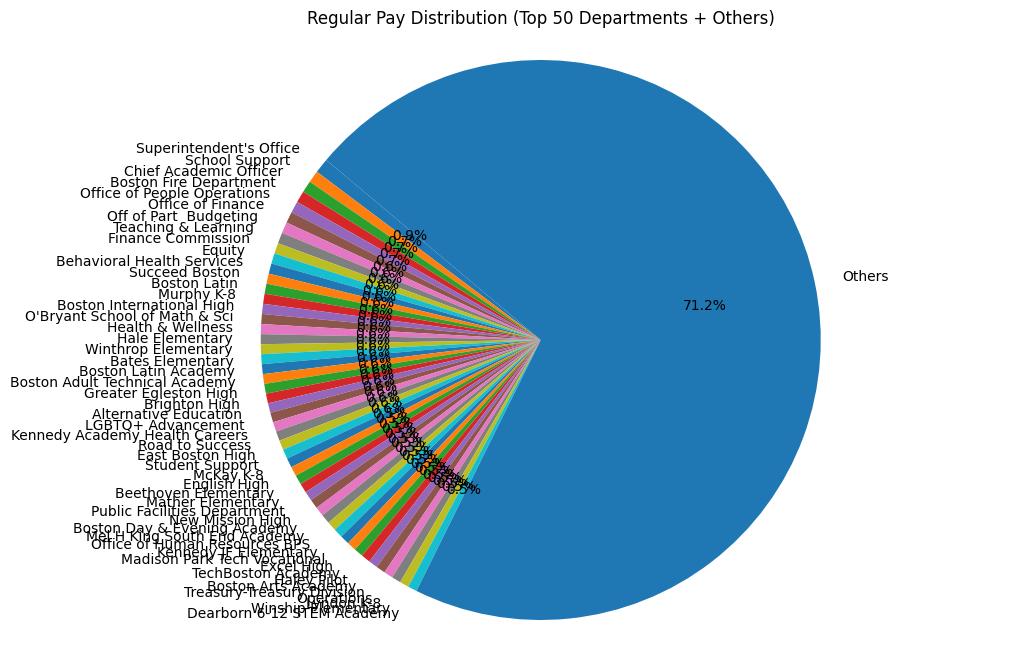

In [57]:
dept_pay = df.groupby('DEPARTMENT_NAME')['REGULAR'].mean().sort_values(ascending=False)

top_n=50
top_dept = dept_pay.head(top_n)
others = pd.Series({'Others': dept_pay.iloc[top_n:].sum()})
dept_pie = pd.concat([top_dept, others])

plt.figure(figsize=(12, 8))
plt.pie(dept_pie, labels=dept_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Regular Pay Distribution (Top 50 Departments + Others)')
plt.axis('equal')
plt.show()

In [58]:
df['DEPARTMENT_NAME'].value_counts()

,count
DEPARTMENT_NAME,
Boston Police Department,2628
Boston Fire Department,1684
Special Education,638
Food & Nutrition Services,509
Facilities Management,474
...,...
Operations,1
Comm. for Persons with Disabil,1
Office of Food Justice,1


In [59]:
df = df[(df != 0).all(axis=1)]

In [60]:
len(df)

14057

In [61]:
df.to_csv("cleaned_police_overtime_data.csv",index=False)

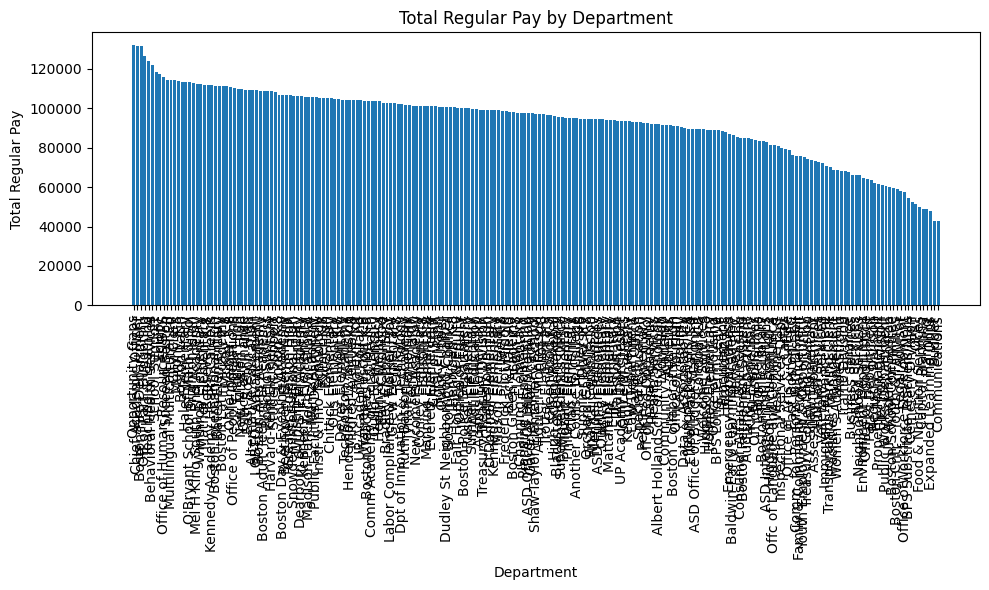

In [62]:
import matplotlib.pyplot as plt
dept_pay = df.groupby('DEPARTMENT_NAME')['REGULAR'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(dept_pay.index, dept_pay.values)
plt.xticks(rotation=90)
plt.xlabel("Department")
plt.ylabel("Total Regular Pay")
plt.title("Total Regular Pay by Department")
plt.tight_layout()
plt.show()